In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from datetime import datetime

In [3]:
ks = pd.read_csv('ks-projects-201801.csv') #read the csv file

In [4]:
tec = ks[ks['main_category'] == 'Technology'] # narrow it down to just the tech category

In [5]:
tecl = tec['launched'].astype('datetime64[ns]').dt.date #convert the launch date to not have time included 

In [6]:
tecd = tec['deadline'].astype('datetime64[ns]').dt.date # same for deadline

In [54]:
df3 = pd.DataFrame({'backers':tec['backers'],
                    'Duration': (abs(tecd-tecl)).dt.days})
#make a dataframe with just the times in, and a difference between them
df3

,backers,Duration
65,0,30
67,0,30
70,15,25
71,3,30
98,3,30
...,...,...
378591,0,30
378611,2,60
378643,0,21
378650,0,38


In [8]:
#sns_plot = sns.jointplot(data=df3, x='backers', y='Duration', kind='kde')
#sns_plot.savefig("output.png")  # makes a heatmap style plot across the whole tech category 

In [9]:
tecsuc = tec[tec['state'] == 'successful'] #just the successful ones

In [10]:
tecfailed = tec[tec['state'] == 'failed'] # just the failed ones

In [11]:
df4 = pd.DataFrame({'backers': tecfailed['backers'],'Duration': (abs(tecd-tecl)).dt.days}) #dataframne for the failed ones

In [12]:
#sns_plot1 = sns.jointplot(data=df4, x='backers', y='Duration', kind='kde', color='orchid' )
#sns_plot1.savefig("fail.png")  # makes a heatmap style plot across the failed ones

In [13]:
df5 = pd.DataFrame({'backers': tecsuc['backers'],'Duration': (abs(tecd-tecl)).dt.days}) # same for the successful ones 

In [14]:
#sns_plot2 = sns.jointplot(data=df5, x='backers', y='Duration', kind='kde', color='teal' )
#sns_plot1.savefig("success.png") # plot

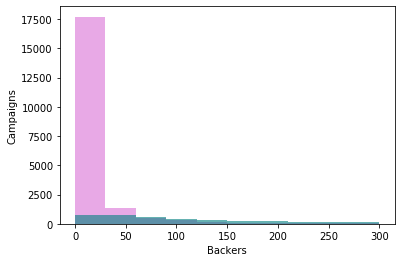

In [15]:
plt.hist([tecfailed['backers']], color='orchid', range=(0,300), alpha=0.6)
plt.hist([tecsuc['backers']], color='teal', range=(0,300), alpha=0.6)
plt.xlabel('Backers')
plt.ylabel('Campaigns')
plt.show()  #histogram of the comparison

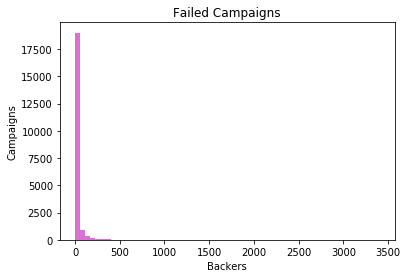

In [23]:
plt.hist([tecfailed['backers']], color='orchid',  bins=60)
#plt.hist([tecsuc['backers']], color='teal', range=(0,300), alpha=0.6)
plt.xlabel('Backers')
plt.ylabel('Campaigns')
plt.title('Failed Campaigns')
plt.show()  #histogram of just the failures 

In [26]:
tfe = tecfailed[tecfailed['backers'] >= 100] # ones with more than 100 supporters

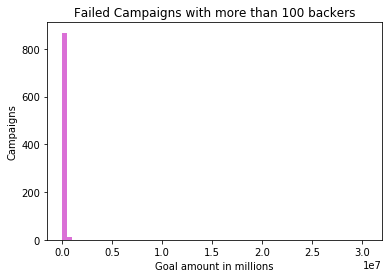

In [29]:
plt.hist([tfe['usd_goal_real']], color='orchid',  bins=60)
plt.xlabel('Goal amount in millions')
plt.ylabel('Campaigns')
plt.title('Failed Campaigns with more than 100 backers') #ended up being in millions because of the two star wars things
plt.show()  #histogram of fails goals

In [36]:
tfe1 = tfe[tfe['usd_goal_real'] <= 1000000] # narrow it down to the ones lower than 

In [33]:
df6 = pd.DataFrame({'Backers': tfe1['backers'],'Goal': tfe1['usd_goal_real']})

In [35]:
df6.describe()

,Backers,Goal
count,880.00000,880.000000
mean,243.88750,87546.080716
std,247.03715,114280.724096
min,100.00000,2000.000000
25%,124.00000,30000.000000
50%,170.50000,50000.000000
75%,270.25000,100000.000000
max,3404.00000,1000000.000000


In [37]:
tfe1 = tfe[tfe['usd_goal_real'] <= 100000] #take out the top 25%

In [38]:
df6 = pd.DataFrame({'Backers': tfe1['backers'],'Goal': tfe1['usd_goal_real']})

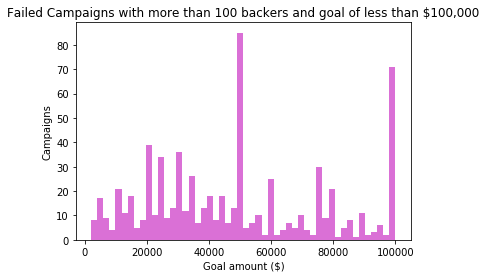

In [41]:
plt.hist([df6['Goal']], color='orchid', bins=50) #spikey one
plt.xlabel('Goal amount ($)')
plt.title('Failed Campaigns with more than 100 backers and goal of less than $100,000')
plt.ylabel('Campaigns')
plt.show()

In [43]:
tse = tecsuc[tecsuc['backers'] >= 1] #do a similar hsitogram for the successful ones
tse1 = tse[tse['usd_goal_real'] <= 100000]
df7 = pd.DataFrame({'Backers': tse1['backers'],'Goal': tse1['usd_goal_real']})

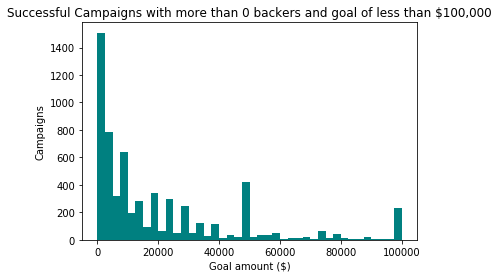

In [46]:
plt.hist([df7['Goal']], color='teal', bins=40)
plt.xlabel('Goal amount ($)')
plt.title('Successful Campaigns with more than 0 backers and goal of less than $100,000')
plt.ylabel('Campaigns')
plt.show()

Text(0, 0.5, 'Campaigns')

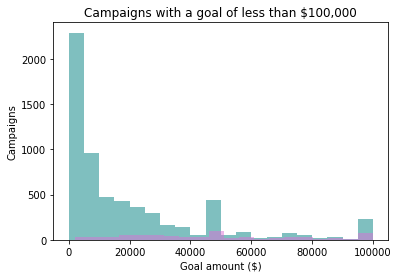

In [47]:
plt.hist([df7['Goal']], color='teal', bins=20, alpha=0.5) #combined histogram
plt.hist([df6['Goal']], color='orchid', bins=20, alpha=0.5)

plt.xlabel('Goal amount ($)')
plt.title('Campaigns with a goal of less than $100,000')
plt.ylabel('Campaigns')

In [48]:
tg = [tecsuc['usd_goal_real']]#deciding how much will be a 'low goal'
np.percentile(tg, 5)

497.3225000000003

In [49]:
#category issssss.....
c =  ks[ks['state'] == 'successful']
#dance, theater, comics are successful
c = c[c['main_category'] != 'Music']
c = c[c['main_category'] != 'Food']
c = c[c['main_category'] != 'Fashion']
c = c[c['main_category'] != 'Games']
c = c[c['main_category'] != 'Film & Video']
c = c[c['main_category'] != 'Design']
c = c[c['main_category'] != 'Photography']
c = c[c['main_category'] != 'Art']
c = c[c['main_category'] != 'Crafts']
c = c[c['main_category'] != 'Journalism']
c = c[c['main_category'] != 'Photography']
c = c[c['main_category'] != 'Publishing']
c = c[c['main_category'] != 'Technology']
#remove all te categories that we dont want to be included

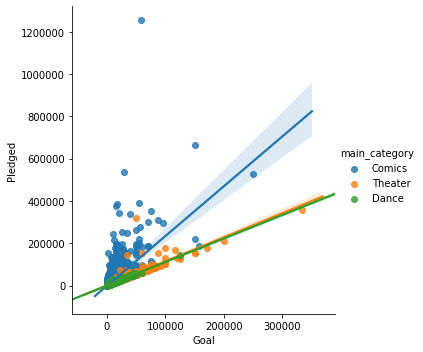

In [50]:
tsn = pd.DataFrame({'main_category': c['main_category'],
    'Goal': c['usd_goal_real'],
       'Pledged':c['usd_pledged_real'], 
       'Difference': (c['usd_pledged_real']-c['usd_goal_real']) })
sns.lmplot(data=tsn, x='Goal', y='Pledged', hue='main_category') #plot of successful categories 

In [51]:
#category issssss.....
c =  ks[ks['state'] == 'successful']
#plot to compare most and least successful categories 
c = c[c['main_category'] != 'Music']
c = c[c['main_category'] != 'Food']
c = c[c['main_category'] != 'Fashion']
c = c[c['main_category'] != 'Games']
c = c[c['main_category'] != 'Film & Video']
c = c[c['main_category'] != 'Design']
c = c[c['main_category'] != 'Photography']
c = c[c['main_category'] != 'Art']
c = c[c['main_category'] != 'Crafts']
c = c[c['main_category'] != 'Journalism']
c = c[c['main_category'] != 'Photography']
c = c[c['main_category'] != 'Publishing']
c = c[c['main_category'] != 'Theater']
c = c[c['main_category'] != 'Comics']

In [52]:
tsn = pd.DataFrame({'main_category': c['main_category'],
    'Goal': c['usd_goal_real'],
       'Pledged':c['usd_pledged_real'], 
       'Difference': (c['usd_pledged_real']-c['usd_goal_real']) })

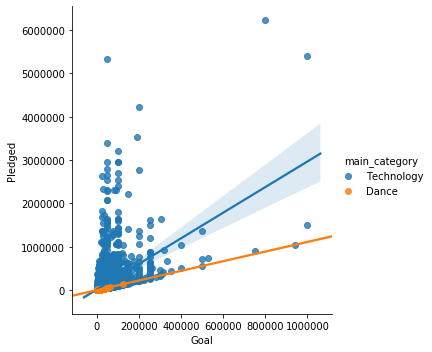

In [53]:
sns.lmplot(data=tsn, x='Goal', y='Pledged', hue='main_category') #plot for tech vs dance